In [23]:
from scipy.io import loadmat
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import shap
import numpy as np
from yellowbrick.features import PCA

shap.initjs()

## Outlier Detection

 - Sometimes used to help clean your dataset
 - Outlier detection is a principled way of investigating
 - Manual inspection becomes difficult in high dimension
 - Typically unsupervised

## Data Example

 - Using a classic: Lympho dataset from the UCI Machine Learning Repository
 - Lymphography is a medical imaging procedure to detect Lymph node-based cancers (mostly replaced by PET scans)
 - Contains 148 data points with 18 features and 6 outliers


In [35]:
data = loadmat("data/lympho.mat")
features = data['X']
labeler = LabelEncoder()
ground_truth = labeler.fit_transform(data['y'].ravel())
labels = ['Typical', 'Outlier']
feature_labels = ["lymphatics", "block_of_affere", "bl_of_lymph_c", "bl_of_lymph_s", "by_pass", "extravasates", "regeneration_of", "early_uptake_in", "lym_nodes_dimin", "lym_nodes_enlar", "changes_in_lym", "defect_in_node", "changes_in_node", "changes_in_stru", "special_forms", "dislocation_of", "exclusion_of_no", "no_of_nodes_in"]

## What does the data look like?

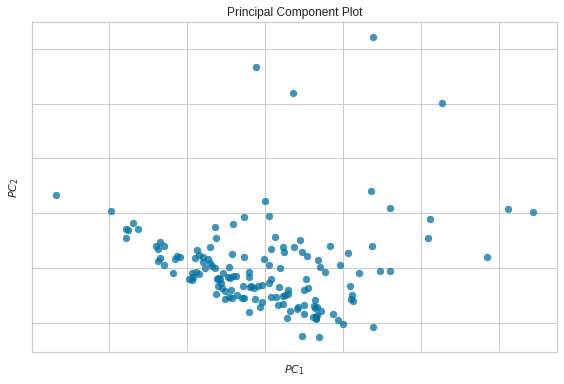

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [54]:
pca_visualizer = PCA(scale=True)
pca_visualizer.fit_transform(features)
pca_visualizer.show()

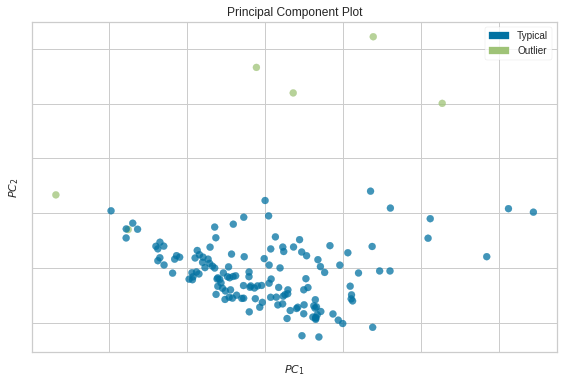

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [55]:
pca_visualizer = PCA(scale=True, classes=labels)
pca_visualizer.fit_transform(features, ground_truth)
pca_visualizer.show()

## Isolation Forests

 - Most OD methods rely on a measure of distance
 - Isolation Forests use Extra Random Forest to partition the data
 - Outliers are more likely to be in the minority class of any random split
 - Data points that are consistently isolated near the top of a tree are outliers

![](img/IsolationForest1.png)

In [45]:
iso_forest = IsolationForest(random_state=1, n_jobs=-1, n_estimators=500, contamination=0.04)

In [47]:
model_prediction = iso_forest.fit_predict(features)
model_prediction = labeler.transform(np.vectorize(lambda x: 0 if x == 1 else 1)(model_prediction))

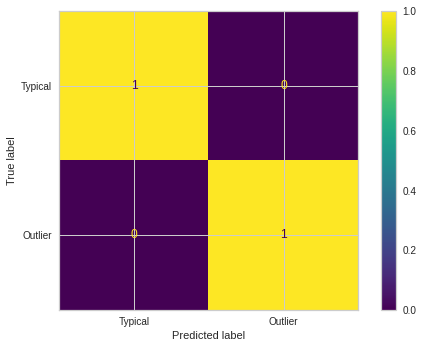

In [48]:
cm = confusion_matrix(model_prediction, ground_truth, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

## SHAP

 - IF works great, but we don't know why an outlier is an outlier
 - Identifying the reason informs your decision to remove a data point from a dataset

## SHAP Values

 - Shapley values measure the marginal contribution of each feature
 - Traditional Shapley values scale fatorially with the number of features!

In [49]:
shap_explainer = shap.Explainer(iso_forest, algorithm='tree', feature_names=feature_labels)
shap_values = shap_explainer(features)

In [50]:
shap.force_plot(shap_values[0])

In [52]:
shap.force_plot(shap_values[-1])

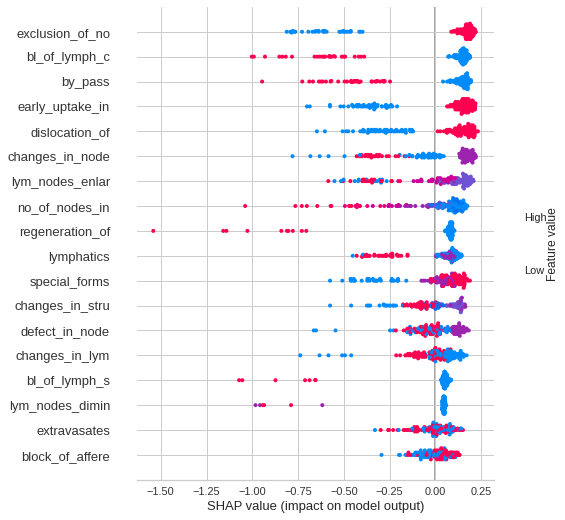

In [44]:
shap.summary_plot(shap_values)

## Bibliography

In [34]:
data['X'].shape

(148, 18)